# ¿Cuánto tardará el área de Chernobyl en dejar de ser radiactiva?

Con motivo del 30 aniversario del conocido accidente en la central nuclear ucraniana y, a pesar de mi escaso tiempo estos días, he decidido refrescar mis conocimientos de bachillerato y hacer una estimación de qué porcentaje del material liberado continúa siendo radiactivo.

No me he complicado mucho la vida y he tirado de la [primera fuente que he encontrado](http://www.greenfacts.org/en/chernobyl/toolboxes/half-life-radioisotopes.htm). En el artículo trataré los isótopos de **Yodo-131**, **Cesio-137**, **Estroncio-90** y **Plutonio-241**.

El nivel es lo suficientemente sencillo como para que se siga fácilmente por alumos de segundo curso de bachiller o primeros años de carrera científico-técnica (hasta donde llega mi escaso conocimiento sobre el tema). Con ello animo a cualquiera que haya llegado hasta él a echarle un ojillo, aprender y, sobre todo (y muy, muy agradecido por ello) ayudarme a corregir los cientos de posibles errores (de planteamiento y ejecución) en los que puedo haber incurrido.

Sin enrrollarme más, cargamos lo necesario y ¡manos a la obra!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ley del Decaimiento Radiactivo

Los isótopos radiactivos son inestables y transmutan a otro elemento (radiactivo o no) emitiendo a su vez radiación de los tipos $\alpha$ (núcleos de **Helio-4**, es decir, 2 protones y 2 neutrones), $\beta$ (electrones) o $\gamma$ (radiación electromagnética); a esta transformación se la conoce como **Decaimiento Radiactivo**.

La velocidad de decaimiento radiactivo obedece a la siguiente ley (donde $\lambda$ es la **Constante de Decaimiento**):
$$ \displaystyle \frac{dN(t)}{dt} = - \lambda N $$

La ecuación anterior tiene un significado más intuitivo si se sustituye $\lambda$ por su inversa $\tau$, conocida como **Vida Media**, que viene a ser el tiempo medio que tarda una partícula en decaer:
$$ \tau = \displaystyle \frac{1}{\lambda} $$

Se puede calcular entonces el número de partículas que aún no han decaido resolviendo la siguiente ecuación diferencial sencilla:
$$
   \left \lbrace
     \begin{array}{1}
       \displaystyle \frac{dN(t)}{dt} + \displaystyle \frac{N}{\tau} = 0 \\
       N(0) = N_0
     \end{array}
   \right.
$$

La fracción de isótopos radiactivos remanente es una ley exponencial negativa muy sencilla, es decir, se decelera a medida que avanza:
$$ \displaystyle \frac{N}{N_0} = e^{- \frac{t}{\tau}} $$

Codificar esta fórmula en **Python** es extremadamente sencillo:

In [2]:
def remain(t, T):
    return 100. * np.exp(-t / T)

## Tiempos de semidesintegración

Como puede observarse en la referencia consultada, la **Vida Media** no es el dato que se suele utilizar para caracterizar la durabilidad de un isótopo radiactivo. En su lugar, la medida más utilizada se conoce como **Tiempo de Semidesintegración**, que viene a ser el período de tiempo necesario para que desaparezca la mitad de los isótopos originales.

Para calcular $\lambda$ en función de $t_{1/2}$ basta con sustituir su definición en la ecuación que se ha obtenido en el apartado anterior:

$$ \frac{N(t_{1/2})}{N_0} = e^{-\frac{t_{1/2}}{\tau}} = \frac{1}{2} $$

Resultando:

$$ \tau = \frac{t_{1/2}}{ln(2)} $$

Del artículo, los tiempos de semidesintegración de los distintos elementos:

In [3]:
t12_I131 = 0.02
t12_Cs137 = 30.07
t12_Sr90 = 29.12
t12_Pu241 = 14.41

La vida media es ligeramente superior:

In [4]:
def mean_life(half_life):
    return half_life / np.log(2)

T_I131 = mean_life(t12_I131)
T_Cs137 = mean_life(t12_Cs137)
T_Sr90 = mean_life(t12_Sr90)
T_Pu241 = mean_life(t12_Pu241)

## Gráficas de decaimiento

Como decía, estas leyes son muy sencillas, por lo que representarlas no representa ninguna dificultad. Primero, se obtienen las curvas para cada isótopo:

In [5]:
t = np.linspace(0., 30., 250)
N_I131 = remain(t, T_I131)
N_Cs137 = remain(t, T_Cs137)
N_Sr90 = remain(t, T_Sr90)
N_Pu241 = remain(t, T_Pu241)

Y se representan:

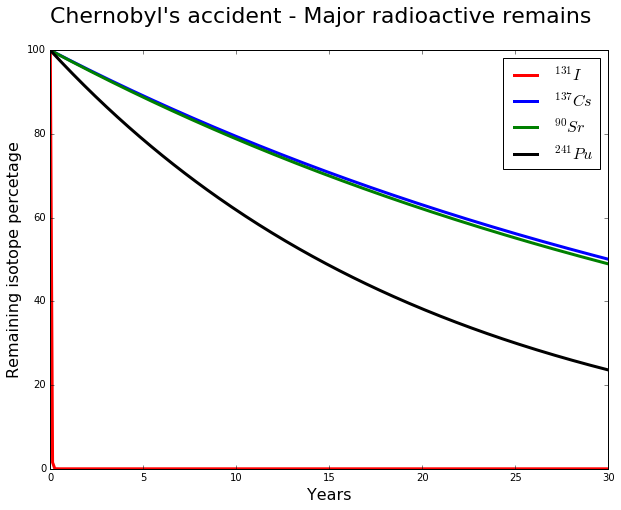

In [6]:
plt.suptitle('Chernobyl\'s accident - Major radioactive remains', fontsize=22)
plt.gcf().set_size_inches(10, 7.5)
plt.plot([30., 30.], [0., 100.], 'k--')
plt.plot(t, N_I131, color='red', linewidth=3, label=r'$^{131}I$')
plt.plot(t, N_Cs137, color='blue', linewidth=3, label=r'$^{137}Cs$')
plt.plot(t, N_Sr90, color='green', linewidth=3, label=r'$^{90}Sr$')
plt.plot(t, N_Pu241, color='black', linewidth=3, label=r'$^{241}Pu$')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Remaining isotope percetage', fontsize=16)
plt.legend(loc=1, fontsize=16)

A la vista de la gráfica, los resultados obtenidos parecen mucho más alentadores de lo que tenía entendido. El **Yodo-131**, el más peligroso las primeras semanas después del accidente por su fácil absorción por la glándula tiroides, desapareció al cabo de unos meses. Los valores del **Cesio-137** y el **Estroncio-90** son los esperados, y ya sólo se encuentra activo la mitad del total liberado. Me llevé una sorpresa con el **Plutonio**.

Siempre había escuchado que la contaminación por $^{239}Pu$ (el utilizado en las armas nucleares) duraba por milenios (el tiempo de semidesintegración del $^{239}Pu$ es de 24.200 años). Sin embargo, según los resultados obtenidos en 100 años habrá desaparecido todo el $^{241}Pu$ liberado en el accidente...

De acuerdo, no estoy seguro de si la fuente consultada estará errada o no; de si el agente contaminante liberado es $^{239}Pu$ o $^{241}Pu$. Consultando otras fuentes, el $t_{1/2}$ para el $^{241}Pu$ es el correcto ¿entonces?

Como bien indica la fuente, el $^{241}Pu$ decae en $^{241}Am$, que también es radiactivo. Luego habrá que tenerlo en cuenta.

## Cadena de decaimiento

El **Americio-241** no es un producto directo del escape radioactivo, es un subproducto del decaimiento radiactivo del $Pu^{241}$, con un tiempo de semidesintegración mucho más elevado que el de los anteriores isótopos:

In [7]:
t12_Am241 = 432.20
T_Am241 = mean_life(t12_Am241)

Teniendo en cuenta que cada átomo de $^{241}Pu$ transmuta en uno de $^{241}Am$ emitiendo radiación de tipo beta, la cantidad de partículas generada es:

$$ N_{Am} = N_0 \left( 1 - e^{\frac{t}{\tau_{Pu}}} \right) $$

Derivando se obtiene la tasa de generación:

$$ \displaystyle \frac{dN_{Am}}{dt} =
     \displaystyle \frac{N_0}{\tau_{Pu}} e^{\frac{-t}{\tau_{Pu}}} $$

La tasa de generación se convierte en un término forzante en la ecuación del decaimiento radiactivo. La ponderación se hace respecto a la cantidad de partículas de $^{241}Pu$ originales, siendo estás la fuente de las de $^{241}Am$. También cambia la condición de contorno, no existiendo $^{241}Am$ en un principio:

$$
   \left \lbrace
     \begin{array}{1}
       \displaystyle \frac{dN(t)}{dt} + \displaystyle \frac{N}{\tau_{Am}} =
         \displaystyle \frac{N_0}{\tau_{Pu}} e^{\frac{-t}{\tau_{Pu}}} \\
       N(0) = 0
     \end{array}
   \right.
$$

Para hacer más sencilla la resolución del problema, se adimensionaliza la ecuación con el número de partículas originales de $^{241}Pu$ y su vida media:

$$
   \left \lbrace
     \begin{array}{1}
       \displaystyle \frac{d\tilde N(t)}{d\tilde t} +
         \left(\displaystyle \frac{\tau_{Pu}}{\tau_{Am}}\right) \tilde N =
         \displaystyle e^{-\tilde t} \\
       \tilde N(0) = 0
     \end{array}
   \right.
$$

Se descompone la ecuación diferencial lineal de coeficientes constantes en sus partes homogénea y particular:

$$ \tilde N = \tilde N_h + \tilde N_p $$
$$
   \left \lbrace
     \begin{array}{1}
       \tilde N_h = C_1 e^{-\left(\frac{\tau_{Pu}}{\tau_{Am}}\right) \tilde t} \\
       \tilde N_p = C_2 e^{-\tilde t}
     \end{array}
   \right.
$$

Sustituyendo la solución particular en la ecuación diferencial se despeja la constante $C_2$:

$$ C_2 = \displaystyle \left( \frac{\tau_{Pu}}{\tau_{Am}} - 1 \right) ^ {-1} $$

Y aplicando las condiciones iniciales se haya el valor de la constante $C_1$:

$$ C_1 = - C_2 $$

Con lo que finalmente resulta:

$$ \tilde N(\tilde t) = \displaystyle \frac{\tau_{Am}}{\tau_{Am} - \tau_{Pu}}
     \left[ e^{-\left(\frac{\tau_{Pu}}{\tau_{Am}}\right) \tilde t} - e^{-\tilde t} \right] $$

Finalmente, la ley que combina generación y decaimiento tiene el siguiente aspecto en variables naturales:

$$ \displaystyle \frac{N}{N_0} = \displaystyle \frac{\tau_{Am}}{\tau_{Am} - \tau_{Pu}}
     \left[ e^{-\frac{t}{\tau_{Am}}} - e^{-\frac{t}{\tau_{Pu}}} \right] $$

Una ley no mucho más compleja de codificar que la del decaimiento:

In [8]:
def subproduct_remain(t, T_sp, T_p):
    return 100 * T_sp * (np.exp(-t / T_sp) - np.exp(-t / T_p)) / (T_sp - T_p)

Al tener el $^{241}Am$ una vida media superior al medio milenio, conviene dibujar la gráfica anterior con unos cuantos años vista:

In [9]:
t = np.linspace(0., 100., 250)
N_I131 = remain(t, T_I131)
N_Cs137 = remain(t, T_Cs137)
N_Sr90 = remain(t, T_Sr90)
N_Pu241 = remain(t, T_Pu241)
N_Am241 = subproduct_remain(t, T_Am241, T_Pu241)

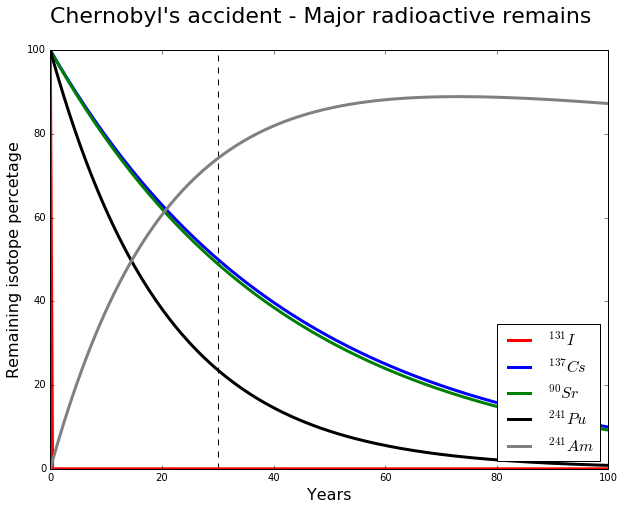

In [10]:
plt.suptitle('Chernobyl\'s accident - Major radioactive remains', fontsize=22)
plt.gcf().set_size_inches(10, 7.5)
plt.plot([30., 30.], [0., 100.], 'k--')
plt.plot(t, N_I131, color='red', linewidth=3, label=r'$^{131}I$')
plt.plot(t, N_Cs137, color='blue', linewidth=3, label=r'$^{137}Cs$')
plt.plot(t, N_Sr90, color='green', linewidth=3, label=r'$^{90}Sr$')
plt.plot(t, N_Pu241, color='black', linewidth=3, label=r'$^{241}Pu$')
plt.plot(t, N_Am241, color='gray', linewidth=3, label=r'$^{241}Am$')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Remaining isotope percetage', fontsize=16)
plt.legend(loc=4, fontsize=16)

Como puede observarse, el $^{241}Am$ "toma el relevo" del $^{241}Pu$ aumentando hasta que este último se ha agotado prácticamente. ¿Durará los milenios de los que tenía noticia?

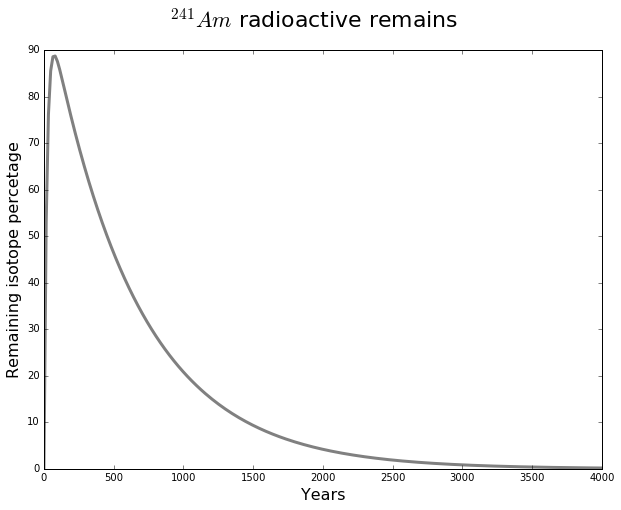

In [11]:
t = np.linspace(0., 4000., 250)
plt.gcf().set_size_inches(10, 7.5)
N_Am241 = subproduct_remain(t, T_Am241, T_Pu241)
plt.suptitle('$^{241}Am$ radioactive remains', fontsize=22)
plt.plot(t, N_Am241, color='gray', linewidth=3)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Remaining isotope percetage', fontsize=16)

Parece que sí, según este análisis la zona no podría considerarse libre de radiación hasta pasados ¡4 milenios!

## Conclusión

Con este minúsculo ensayo tan sólo pretendía obtener algunas gráficas sencillas para estimar "por dónde íbamos" en el asunto **Chernobyl**. Más allá de la exactitud de los modelos, de las sustancias reales que ahora mismo siguen envenenando la tierra, y de todo lo desacertado que puedan haber sido mis estimaciones; el sólo echar un vistazo al tiempo que tarda en desaparecer la mitad de cada uno de esos elementos me hace preguntarme si en realidad merece la pena tanto riesgo por un poco de energía. Aún sin accidentes, los residuos radiactivos resultantes de la operación normal de una central nuclear continuarán siendo tóxicos durante milenios.

Como dice el astrofísico **Hubert Reeves**: "El problema de las centrales nucleares es que significa hipotecar el futuro.